<a href="https://colab.research.google.com/github/keilabcs/IN1024-2020-1-UFPE/blob/main/Exerc%C3%ADcio_pr%C3%A1tico_do_Cap%C3%ADtulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidade Federal de Pernambuco

Centro de Informática - Cin

Programa de Pós-Graduação

IN1024 - Processamento de Imagens

Keila Barbosa Costa dos Santos



##Combinando métodos de realce espacial

Frequentemente, uma dada tarefa demandará a aplicação de várias técnicas de realce complementares, para atingir um resultado aceitável. 
Com isso, combine diferentes métodos para realçar os detalhes desejaveis na **Image 1** obtendo resultados semelhantes ao exemplo no livro.
Devera ser aplicado o seguinte procedimento:

In [ ]:
# Carregando pacotes 
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# import the new one
from PIL import Image
from socket import socket

In [ ]:
# Download Images
from google.colab import files
pbfile = files.upload()

In [ ]:
!ls -la

total 256
drwxr-xr-x 1 root root   4096 Sep 15 19:40 .
drwxr-xr-x 1 root root   4096 Sep 15 18:41 ..
drwxr-xr-x 1 root root   4096 Sep 14 16:31 .config
drwxr-xr-x 1 root root   4096 Sep 14 16:31 sample_data
-rw-r--r-- 1 root root 242754 Sep 15 19:40 skeleton.tif


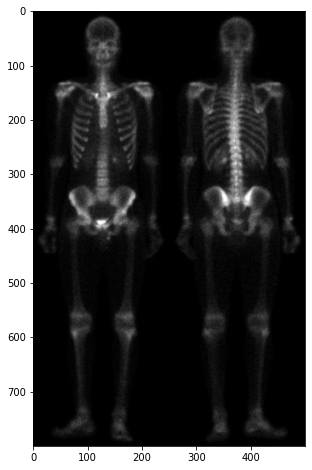

In [ ]:
img = cv2.imread("skeleton.tif")
plt.figure(figsize = (15,8))
plt.imshow(img)
plt.show()

Operação 1: Aplique o operador Laplaciano na **Imagem 1** e adicione o resultado do Laplaciano a **Imagem 1**.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


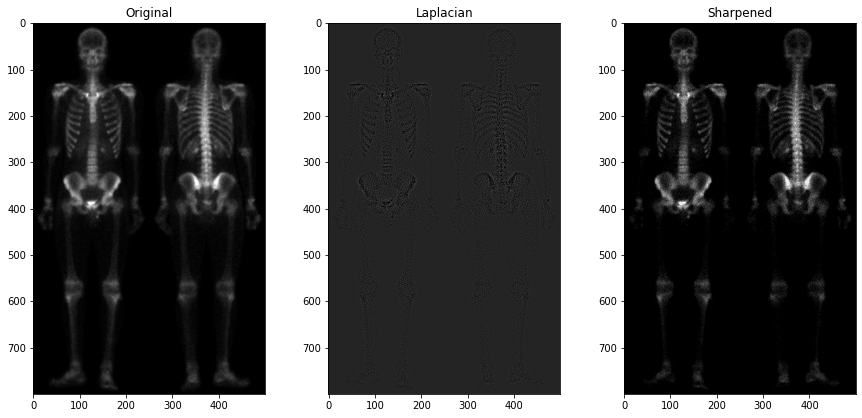

In [ ]:
def adjust(img, L):
    min_subtraction = img - np.amin(img)
    res = np.int8((L-1)*(min_subtraction/np.amax(min_subtraction)) + np.amax(min_subtraction))
    return res

laplacian_kernelA = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])

moon_laplacianA = cv2.filter2D(img, cv2.CV_16S, laplacian_kernelA)
moon_laplacianA = adjust(moon_laplacianA, 256)

# Using c = 0.5
sharp = img - moon_laplacianA//2

plt.figure(figsize=(15,15))
plt.subplot(231);plt.title('Original');plt.imshow(img)
plt.subplot(232);plt.title('Laplacian');plt.imshow(moon_laplacianA)
plt.subplot(233);plt.title('Sharpened');plt.imshow(sharp)

In [ ]:
#Salvando a Imagem
cv2.imwrite("laplaciano.jpg", moon_laplacianA)

True

Outra maneira de aplicar o operador Laplaciano na Imagem

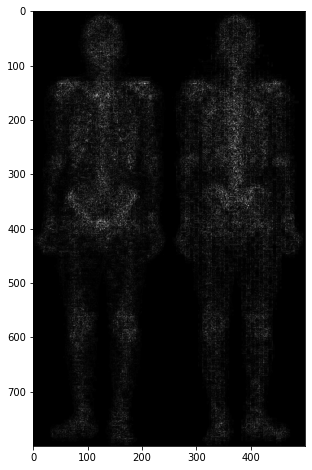

In [ ]:
# Apply the Laplacian Filter
laplace = cv2.Laplacian(img, ddepth=cv2.CV_64F, ksize=3)
# Convert to uint8
laplace = cv2.convertScaleAbs(laplace)
# Show the result of the laplacian filter
plt.figure(figsize=(6,8))
plt.imshow(laplace)
plt.show()

Operação 2: Aplique o gradiente Sobel na **Imagem 1**.

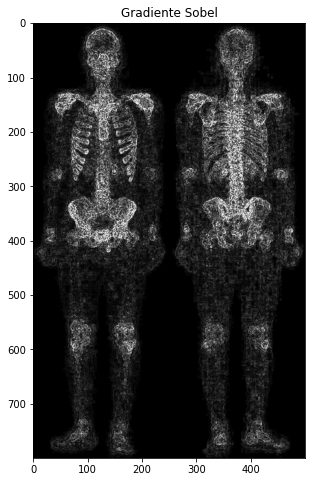

In [ ]:
# Convert to uint8
moon_laplacianA = cv2.convertScaleAbs(sharp)

# Note que devido ao processamento do Sobel é preciso trabalhar com a imagem com ponto flutuante de 64 bits 
# (que suporta valores positivos e negativos) para depois converter para uint8 novamente.

sobelX = cv2.Sobel(moon_laplacianA, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(moon_laplacianA, cv2.CV_64F, 0, 1)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
sobel = cv2.bitwise_or(sobelX, sobelY)
resultado = np.vstack([
np.hstack([moon_laplacianA, sobelX]),
np.hstack([sobelY, sobel])
])

plt.figure(figsize=(5,8))
plt.title('Gradiente Sobel')
plt.imshow(sobel)
plt.show()


Operação 3: Aplique um filtro de média na imagem resultante da Operação 2.

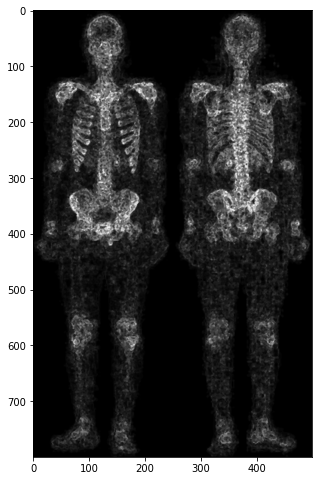

In [ ]:
suave = cv2.medianBlur(sobel, 3)

plt.figure(figsize=(5,10))
plt.imshow(suave)
plt.show()

In [ ]:
#Salvando a Imagem
cv2.imwrite("suave.jpg", suave)

True

In [ ]:
# install the new one
!pip install Pillow
!pip install pytesseract
!pip install cv

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=9b9b8cf4427402068a458e866396ead1e0c10474bed9a7722c39a0f96e82697b
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pytesseract
ERROR: Could not find a version that satisfies the requirement cv (from versions: none)
ERROR: No matching distribution found for cv


Operação 4: Aplique um produto *pixel-to-pixel* entre os resultados da Operação 1 e a Operação 3.

(800, 500, 3)
A imagem consiste em 400000 pixels
(800, 500, 3)
A imagem consiste em 400000 pixels


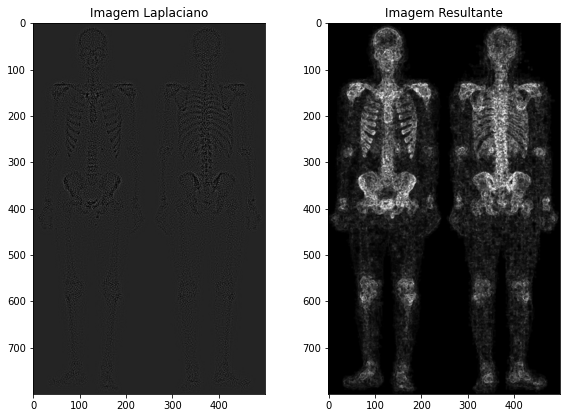

In [ ]:
# Converte uma imagem PIL em um numpyarray
#moon_laplacianA (Operação 1)
#suave (Operação 3)

from PIL import Image
from IPython.display import display
import requests
from pprint import pprint

# Carregue a imagem original e obtenha seu tamanho e modo de cor.

orig_image=plt.imread("laplaciano.jpg")
print(orig_image.shape)
print(f"A imagem consiste em {orig_image.shape[0] * orig_image.shape[1]} pixels")


image_result=plt.imread("suave.jpg")
print(image_result.shape)
print(f"A imagem consiste em {image_result.shape[0] * image_result.shape[1]} pixels")


plt.figure(figsize=(15,15))
plt.subplot(231);plt.title('Imagem Laplaciano');plt.imshow(orig_image)
plt.subplot(232);plt.title('Imagem Resultante');plt.imshow(image_result)


In [ ]:
# Converte uma imagem PIL em um numpyarray

import numpy
np_im = numpy.array(orig_image)
print (np_im.shape)

np_im2 = numpy.array(image_result)
print (np_im2.shape)

(800, 500, 3)
(800, 500, 3)


In [ ]:
filename = 'laplaciano.jpg'
filepath = f"{filename}"

# Carregue a imagem original e obtenha seu tamanho e modo de cor.
orig_image = Image.open(filepath)
width, height = orig_image.size
mode = orig_image.mode

# Mostra informações sobre a imagem original.
print(f"Original image: {filename}")
print(f"Size: {width} x {height} pixels")
print(f"Mode: {orig_image.mode}")

# Carregue todos os pixels da imagem.
orig_pixel_map = orig_image.load()

Original image: laplaciano.jpg
Size: 500 x 800 pixels
Mode: RGB


In [ ]:
filename1 = 'suave.jpg'
filepath1 = f"{filename}"

# Carregue a imagem original e obtenha seu tamanho e modo de cor.
result_image = Image.open(filepath1)
width, height = result_image.size
result_mode = result_image.mode

# Mostra informações sobre a imagem original.
print(f"Original image: {filename}")
print(f"Size: {width} x {height} pixels")
print(f"Mode: {result_image.mode}")

# Carregue todos os pixels da imagem.
result_pixel_map = result_image.load()

Original image: laplaciano.jpg
Size: 500 x 800 pixels
Mode: RGB


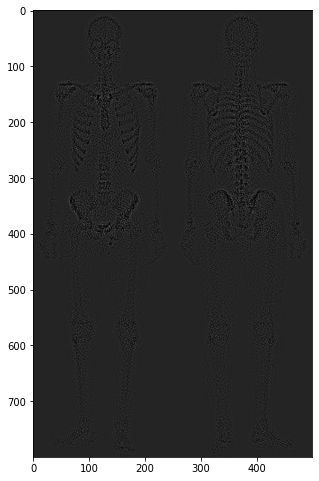

In [ ]:
# Modifique cada pixel na nova imagem.
for x in range(width):
    for y in range(height):
        # Copie o pixel original para result mapa de pixels.
        result_pixel_map[x, y] = orig_pixel_map[x, y]

plt.figure(figsize=(5,10))
plt.imshow(result_image)
plt.show()

In [ ]:
!pip install str

  Created wheel for str: filename=str-0.1-cp36-none-any.whl size=1151 sha256=1255a8694ec9a14569ca1d025cbaa2a53d3799d1ff02bfd2023e407778bc9350
  Stored in directory: /root/.cache/pip/wheels/5f/32/f9/9002aff1e089937c0375a445dfeb9084f1617a378a0403b318
Successfully built str


In [ ]:
!pip install load

  Created wheel for load: filename=load-0.0.0-cp36-none-any.whl size=1321 sha256=6858557b5e2d57a257d3e296df2c6e0444fd40a43b48d4a870215acd9ee918e3
  Stored in directory: /root/.cache/pip/wheels/51/92/1e/ac4145d61eb35d4341bc9ab6411225360a68c298d7b12b64be
Successfully built load


Operação 5: Somar a imagem original com a resultante da Operação 4.

In [ ]:
#img1 = cv2.LoadImage(result_image, 0)
#img2 = cv2.LoadImage(img, 0)

new_im = Image.new('RGB',  (2*img[0],2*img[1]), (250,250,250))

Operação 6: Aplique transformação Gamma no resultado da Operação 5.

In [ ]:
def gamma(x, gamma):
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    y = cv2.LUT(x, lookUpTable)
    return y

gamma_path = 'new_im.tif'
gamma_param = 5.0
gamma_img = cv2.imread(gamma_path)
gamma_result = gamma(gamma_img, gamma_param)

plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('Original Image');plt.imshow(gamma_img)
plt.subplot(232);plt.title('Gamma Corretion');plt.imshow(gamma_result)

In [ ]:
MRI_example_path = 'new_im.tif'
gamma_param = 0.6
MRI_img = cv2.imread(MRI_example_path)
MRI_result = gamma(MRI_img, gamma_param)
gamma_param = 0.3
MRI_result2 = gamma(MRI_img, gamma_param)

plt.figure(figsize=(20,15))
plt.subplot(231);plt.title('MRI Original');plt.imshow(MRI_img)
plt.subplot(232);plt.title('MRI Gamma Corretion 1');plt.imshow(MRI_result)
plt.subplot(233);plt.title('MRI Gamma Corretion 2');plt.imshow(MRI_result2)

In [ ]:
city_example_path = 'new_im.tif'
gamma_param = 3.0
city_img = cv2.imread(city_example_path)
city_result = gamma(city_img, gamma_param)
gamma_param = 5.0
city_result2 = gamma(city_img, gamma_param)

plt.figure(figsize=(15,10))
plt.subplot(231);plt.title('City Original');plt.imshow(city_img)
plt.subplot(232);plt.title('City Gamma Corretion 1');plt.imshow(city_result)
plt.subplot(233);plt.title('City Gamma Corretion 2');plt.imshow(city_result2)

Obs: O resultado final deve ser próximo do apresentado na *Imagem 2* e envie os resultados intermediários de cada uma das operações acima.